# **1. 데이터 준비하기**

In [ ]:
# Pytorch로 구현된 손글씨
import torch
from torch import nn  
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 공개 dataset에서 학습 데이터를 내려받음
training_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)
# 공개 데이터셋에서 테스트 데이터를 내려받음
test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [ ]:
batch_size = 64
# 데이터로더를 생성(텐서에서는 데이터 셋)
train_dataloader = DataLoader(training_data,batch_size = batch_size)
test_dataloader = DataLoader(test_data,batch_size = batch_size)

for X,y in test_dataloader:
  print('Shape of X[N,C,H,W] :',X.shape)
  print('Shape of y ',y.dtype)
  break

Shape of X[N,C,H,W] : torch.Size([64, 1, 28, 28])
Shape of y  torch.int64


In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻음
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device: {}".format(device))

Using device: cuda


# **2. 모델 만들기**
- 모델 정의하기
- 손실함수(loss function)와 옵티마이져(optimizer) 설정하기
- 학습과 테스트를 위한 함수 정의 -> 모델에 적용하기

In [ ]:
# 모델 만들기(정의하기)
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__() # NeuralNetwork 클래스를 상속받음, 생성자 호출해주기
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128,10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# loss function과 optimizer 설정하기
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3) # lr: learning mate

In [ ]:
# Training을 위한 함수
def train(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)
  for batch, (X,y) in enumerate(dataloader):
    X , y = X.to(device),y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred,y)

    # 역전파
    optimizer.zero_grad()
    loss.backward() # 미분값 -> 오차값 줄이는 용도
    optimizer.step()

  if batch % 100 == 0:
    loss, current = loss.item(),batch * len(X)
    print(f'loss: {loss:>7f}[{current:>5d}/{size:>5d}]') 

In [ ]:
# Test를 위한 함수
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  print(size)
  num_batches = len(dataloader)
  model.eval() # 모델 활성화시키기(적용하기)
  test_loss,correct = 0,0
  with torch.no_grad():
    for X, y in dataloader:
       X , y = X.to(device),y.to(device)
       pred = model(X)
       test_loss += loss_fn(pred,y).item() # loss값 누적
       correct += (pred.argmax(1) == y).type(torch.float).sum().item()
       test_loss /= num_batches
       correct /= size
       print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%,Avg loss: {test_loss:.8f}\n")

In [ ]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\----------------------------------------------')
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn) # 위치 확인해보기
print("끝")

Epoch 1\----------------------------------------------
10000
Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00083289

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00073939

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00061433

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00144338

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00122222

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00186077

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00116745

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00172594

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00145458

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00158838

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00194398

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00172380

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00077218

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00097815

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00201067

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00156196

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00167502

Test Error: 
 Accuracy: 0.6%,Avg loss: 0.00153578

Test Error: 
 Accurac

In [ ]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('file : {name}, length : {length}bytes'.format(name = fn, length = len(uploaded[fn])))

Saving image.png to image.png
file : image.png, length : 912bytes


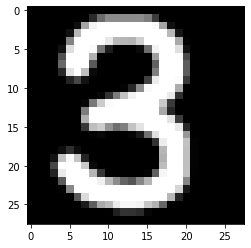

In [ ]:
# image file의 경로 설정하기
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir,'image.png')

# image file 읽기
cur_img = Image.open(img_path)

# 28 * 28로 resize
cur_img = cur_img.resize((28,28))
image = np.array(cur_img)

try:
  image = np.mean(image,axis = 2)
except:
  pass

# upload한 image는 흰 배경에 검은 글씨 -> MNIST 데이터와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(전처리)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image,cmap = 'gray')
plt.show()

In [ ]:
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)
model.eval()
predict = model(image)
print('model이 예측한 결과는 {}입니다.'.format(predict.argmax(1).item()))

model이 예측한 결과는 3입니다.


### **2-1. Dataset과 Dataloader**
- data를 처리하여 model에 공금하는 방법으로 Pytorch에서는 dataset과 dataloader를 제공
- dataset은 data와 label을 저장하고, dataloader는 dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줌

In [ ]:
# 모듈 import 하기
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor() # 텐서로 바꿔주면서 이미지를 0~1사이의 값으로 변경
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

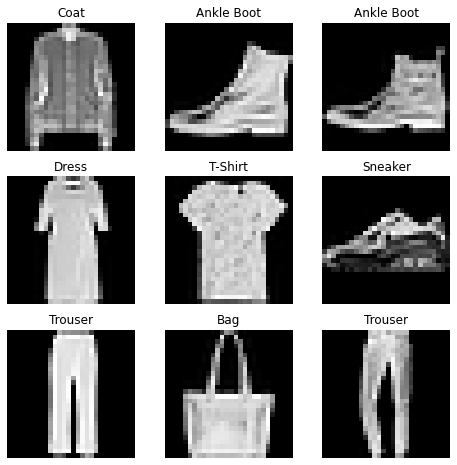

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray') # 채널을 없애줌, 1을 삭제, 28*28
plt.show()

In [ ]:
# DataLoader 만들기 => 데이터 셋을 모델에 공급해주기 위해
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


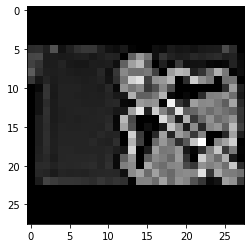

Label: 8


In [ ]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시함
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

In [ ]:
# Model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [ ]:
# Model class 만들기
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )
    
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
# Model instance 생성
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 가상의 data를 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


In [ ]:
# Training / Validation
# 손실함수 초기화
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Optimizer
learning_rate = 1e-3 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 예측(prediction)과 손실(loss) 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    # gradient값들을 backward를 해줄 때 계속 값을 더해주기 때문에
    # loss.backward()를 호출 할 때 초기설정을 매번 더해주므로
    # 한번의 학습이 끝나면 값을 0으로 초기화 해야 함
    optimizer.zero_grad()
    loss.backward() # 역전파가 일어남
    optimizer.step() # 업데이트됨

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad(): # 메모리 절약
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size

  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\n--------------------------')
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("완료!")

Epoch 1
--------------------------
loss: 2.300333 [    0/60000]
loss: 0.531339 [ 6400/60000]
loss: 0.542510 [12800/60000]
loss: 0.756531 [19200/60000]
loss: 0.586586 [25600/60000]
loss: 0.476842 [32000/60000]
loss: 0.292461 [38400/60000]
loss: 0.436252 [44800/60000]
loss: 0.457867 [51200/60000]
loss: 0.501970 [57600/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.473058 

Epoch 2
--------------------------
loss: 0.378464 [    0/60000]
loss: 0.332961 [ 6400/60000]
loss: 0.414920 [12800/60000]
loss: 0.414779 [19200/60000]
loss: 0.339891 [25600/60000]
loss: 0.561003 [32000/60000]
loss: 0.480232 [38400/60000]
loss: 0.486528 [44800/60000]
loss: 0.250817 [51200/60000]
loss: 0.490565 [57600/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.420167 

Epoch 3
--------------------------
loss: 0.401693 [    0/60000]
loss: 0.311872 [ 6400/60000]
loss: 0.200551 [12800/60000]
loss: 0.397098 [19200/60000]
loss: 0.349807 [25600/60000]
loss: 0.395888 [32000/60000]
loss: 0.323532 [38400/60000]
loss: 0.

# **3. 모델 저장하기, 불러오기**

In [ ]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# 새 model instance를 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# test(학습 전, 모델 객체만 만들어 놓은 상태 -> accuracy가 매우 낮다.)
model2.eval() # 모델 실행
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 10.9%, Avg loss: 2.318213 



In [ ]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.1%, Avg loss: 0.334440 



In [ ]:
# model 전체를 저장하고 불러오기
# 저장하기
torch.save(model,'model.pth')

In [ ]:
# 불러오기
model3 = torch.load('model.pth')

In [ ]:
# test
model3.eval() # training을 하지 않음, 이미 학습된 모델 불러와서 씀 -> 학습된 것과 비슷한 효과를 낼 수 있다.
test_loop(test_dataloader,model3,loss_fn)

Test Error: 
 Accuracy: 88.1%, Avg loss: 0.334440 

